In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import Input,Dense,Flatten,MaxPool1D,Activation,LeakyReLU,LSTM,BatchNormalization,Dropout, Conv1D,Lambda
from keras.models import Model
import pandas as pd
import keras.backend as K
import h5py
import model_architectures as ma
import utils

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
models_dir = '/content/drive/My Drive/Project-EE5611/Model_files/Models/new_lstm/'
feat_file='/content/drive/My Drive/Project-EE5611/project_features/new_features.h5'
fid=h5py.File(feat_file,'r');
x_tr=fid['x_tr']
y_tr=fid['y_tr'] 
snr_tr = np.array(fid['snr_tr'])
x_ts=fid['x_ts']
y_ts=fid['y_ts']
snr_ts = np.array(fid['snr_ts'])

In [4]:
m1 = ma.new_lstm()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 4)            0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 4)            16        
_________________________________________________________________
lstm_1 (LSTM)                (None, 128, 128)          68096     
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 11)                1419      
Total params: 201,115
Trainable params: 201,107
Non-trainable params: 8
_____________________________________________________

In [0]:
checkpoint = keras.callbacks.ModelCheckpoint(models_dir+ "model_epoch-{epoch:02d}_val_acc-{val_accuracy:.2f}.h5", monitor='val_accuracy', verbose=2, save_best_only=False, save_weights_only=False, mode='auto', period=1)

In [9]:
history = m1.fit(x=x_tr,
       y=y_tr,
       validation_data=[x_ts,y_ts],
       batch_size=400,
       epochs=40,
       shuffle='batch',
       callbacks = [checkpoint],
       verbose=2)

Train on 198000 samples, validate on 22000 samples
Epoch 1/40
 - 110s - loss: 1.5000 - accuracy: 0.4280 - val_loss: 1.3683 - val_accuracy: 0.4716

Epoch 00001: saving model to /content/drive/My Drive/Project-EE5611/Model_files/Models/new_lstm/model_epoch-01_val_acc-0.47.h5
Epoch 2/40
 - 110s - loss: 1.3275 - accuracy: 0.4824 - val_loss: 1.2856 - val_accuracy: 0.4955

Epoch 00002: saving model to /content/drive/My Drive/Project-EE5611/Model_files/Models/new_lstm/model_epoch-02_val_acc-0.50.h5
Epoch 3/40
 - 110s - loss: 1.2700 - accuracy: 0.5016 - val_loss: 1.2756 - val_accuracy: 0.4978

Epoch 00003: saving model to /content/drive/My Drive/Project-EE5611/Model_files/Models/new_lstm/model_epoch-03_val_acc-0.50.h5
Epoch 4/40
 - 110s - loss: 1.2355 - accuracy: 0.5186 - val_loss: 1.2075 - val_accuracy: 0.5332

Epoch 00004: saving model to /content/drive/My Drive/Project-EE5611/Model_files/Models/new_lstm/model_epoch-04_val_acc-0.53.h5
Epoch 5/40
 - 109s - loss: 1.2014 - accuracy: 0.5353 - va

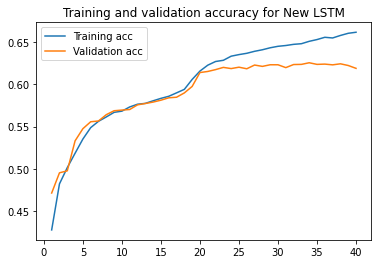

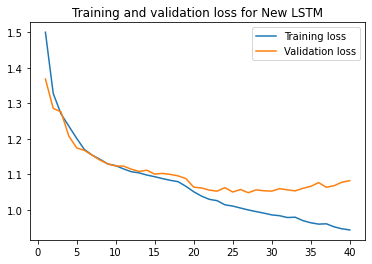

In [10]:
acc_new_lstm = history.history['accuracy']
val_acc_new_lstm = history.history['val_accuracy']
loss_new_lstm = history.history['loss']
val_loss_new_lstm = history.history['val_loss']
epochs = range(1, len(acc_new_lstm) + 1)
plt.plot(epochs, acc_new_lstm, label='Training acc')
plt.plot(epochs, val_acc_new_lstm, label='Validation acc')
plt.title('Training and validation accuracy for New LSTM')
plt.legend()
plt.figure()
plt.plot(epochs, loss_new_lstm, label='Training loss')
plt.plot(epochs, val_loss_new_lstm, label='Validation loss')
plt.title('Training and validation loss for New LSTM')
plt.legend()
plt.show()

In [11]:
print(acc_new_lstm,val_acc_new_lstm,loss_new_lstm,val_loss_new_lstm )

[0.42804545, 0.48240405, 0.5015606, 0.5185505, 0.53530806, 0.54879296, 0.55625254, 0.5614141, 0.5668384, 0.56824243, 0.57321215, 0.5764192, 0.5774242, 0.58046967, 0.5833384, 0.58577776, 0.5898283, 0.59396464, 0.60566664, 0.6155556, 0.62250507, 0.6268535, 0.6282778, 0.6331364, 0.63500506, 0.6365404, 0.6388889, 0.6407071, 0.64305556, 0.6447929, 0.6457273, 0.64710605, 0.64785856, 0.6506717, 0.6527525, 0.65543437, 0.6546364, 0.657601, 0.66015154, 0.66139394] [0.47159090638160706, 0.4954545497894287, 0.4977727234363556, 0.5331818461418152, 0.5475454330444336, 0.5557272434234619, 0.556636393070221, 0.5640909075737, 0.5687272548675537, 0.5695000290870667, 0.5701818466186523, 0.5756818056106567, 0.5772727131843567, 0.5789545178413391, 0.5811818242073059, 0.5839999914169312, 0.5846818089485168, 0.5897727012634277, 0.5974090695381165, 0.6138181686401367, 0.6150909066200256, 0.6172727346420288, 0.6199091076850891, 0.6184999942779541, 0.6201363801956177, 0.6182727217674255, 0.6226817965507507, 0.6